In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
!gdown 1gADYmo2UXlr24dUUNaqyPF2LZXk1HhrJ

Downloading...
From: https://drive.google.com/uc?id=1gADYmo2UXlr24dUUNaqyPF2LZXk1HhrJ
To: /content/sprites_1788_16x16.npy
100% 68.7M/68.7M [00:00<00:00, 86.0MB/s]


In [3]:
sprites = np.load('sprites_1788_16x16.npy')

In [31]:
# 픽셀값을 0~1로 노멀라이즈
x0 = (sprites / 255)[10]

# 노멀라이즈 확인
print(type(x0), x0.shape, x0.min(), x0.max())

<class 'numpy.ndarray'> (16, 16, 3) 0.0 1.0


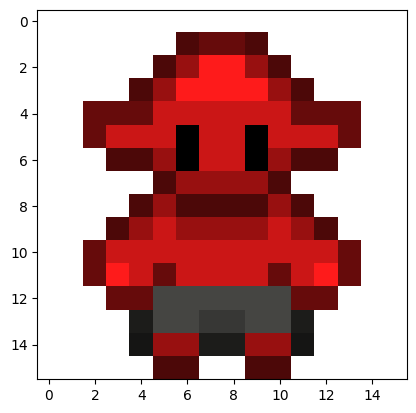

In [5]:
plt.imshow(x0)
plt.show()

In [32]:
# x0가 확률변수라는 것을 실험해보기 위해 다변수 정규분포를 임포트
from scipy.stats import multivariate_normal

In [45]:
# 이미지를 768차원(16*16*3) 확률 벡터 변수로 만들고
x0_flt = x0.reshape(-1)

# 이 이미지 x0_flt를 평균으로 하고
# 0.1정도되는 적당한 수를 곱해서 공분산을 만들어 정규분포를 정의
# 이 수가 커지면 평균으로 부터 멀리 떨어진 이미지까지 샘플링되고
# 작으면 평균과 거의 비슷한 이미지들만 샘플링됨
q_x0 = multivariate_normal(mean=x0_flt, cov=0.1 * np.eye(len(x0_flt)))

In [46]:
# 3개만 샘플링 해서
samples = q_x0.rvs(size=3)


# 크기를 보면 (3,768)
print(samples.shape)

(3, 768)


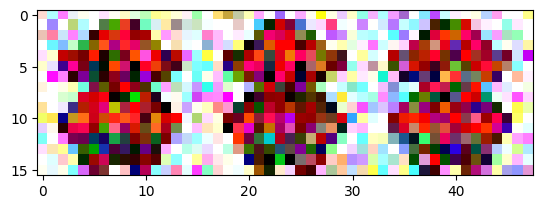

In [47]:
# x0 주변에서 임의로 선택된 샘플들
samples = samples.reshape(3,16,16,3).transpose(1,0,2,3).reshape(16,-1,3).clip(0,1)
plt.imshow(samples)
plt.show()